# A deep learning web application

## Creating functions to handle MNIST dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [15]:
def loadImageFile(fileimage):
  f = open(fileimage, "rb")

  f.read(16)
  
  pixels = 28*28
  images_arr = []

  while True:
    try:
      img = []
      for j in range(pixels):
        pix = ord(f.read(1))
        img.append(pix / 255)
      images_arr.append(img)
    except:
      break
    
  f.close()
  image_sets = np.array(images_arr)
  return image_sets

In [16]:
test_images = loadImageFile("train-images-idx3-ubyte")

In [5]:
image = test_images[0]

In [11]:
np.save("img", image)

In [53]:
def gen_image(arr):
  two_d = (np.reshape(arr, (28, 28))*255).astype(np.uint8)
  plt.imshow(two_d, interpolation="nearest", cmap="gray")
  plt.axis('off')
  plt.savefig("image.png", bbox_inches="tight", pad_inches=0)
  plt.show()
 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3912995864.py, line 5)

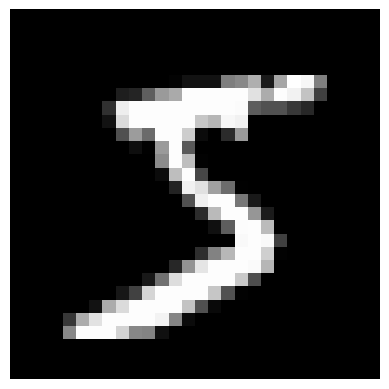

In [52]:
gen_image(test_images[0])

In [35]:
def loadLabelFile(filelabel):
  f = open(filelabel, "rb")

  f.read(8)

  labels_arr = []

  while True:
    row = [0 for x in range(10)]
    try:
      label = ord(f.read(1))
      row[label] = 1
      labels_arr.append(row)
    except:
        break

  f.close()
  label_sets = np.array(labels_arr)
  return label_sets

In [36]:
test_labels = loadLabelFile("train-labels-idx1-ubyte")

In [37]:
print(test_labels[1])

[1 0 0 0 0 0 0 0 0 0]


## Creating a DNN model

In [38]:
import numpy as np
import tensorflow as tf


Getting the data sets

In [39]:
def loadImageFile(fileimage):
  f = open(fileimage, "rb")

  f.read(16)
  
  pixels = 28*28
  images_arr = []
  while True:
    try:
      img = []
      for j in range(pixels):
        pix = ord(f.read(1))
        img.append(pix / 255)
      images_arr.append(img)
    except:
      break
    
  f.close()
  image_sets = np.array(images_arr)
  return image_sets

In [40]:
def loadLabelFile(filelabel):
  f = open(filelabel, "rb")

  f.read(8)

  labels_arr = []

  while True:
    row = [0 for x in range(10)]
    try:
      label = ord(f.read(1))
      row[label] = 1
      labels_arr.append(row)
    except:
        break

  f.close()
  label_sets = np.array(labels_arr)
  return label_sets

In [41]:
train_images = loadImageFile("train-images-idx3-ubyte")
train_labels = loadLabelFile("train-labels-idx1-ubyte")

test_images = loadImageFile("t10k-images-idx3-ubyte")
test_labels = loadLabelFile("t10k-labels-idx1-ubyte")

Reshaping


In [42]:
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

y_train = train_labels
y_test = test_labels

In [43]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(32, kernel_size=3, input_shape=(28,28,1)),
tf.keras.layers.Activation("relu"),
tf.keras.layers.BatchNormalization(axis=-1),

tf.keras.layers.Conv2D(32, kernel_size=3),
tf.keras.layers.Activation("relu"),
tf.keras.layers.MaxPool2D(pool_size=2),

tf.keras.layers.BatchNormalization(axis=-1),
tf.keras.layers.Conv2D(64, kernel_size=3),
tf.keras.layers.Activation("relu"),
tf.keras.layers.BatchNormalization(axis=-1),
tf.keras.layers.Conv2D(64, kernel_size=3),
tf.keras.layers.Activation("relu"),
tf.keras.layers.MaxPool2D(pool_size=2),

tf.keras.layers.Flatten(),

tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation="softmax"),
])



In [44]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [45]:
model.fit(X_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=2,
          validation_split=0.2)

Epoch 1/10
480/480 - 103s - loss: 0.1068 - accuracy: 0.9675 - val_loss: 0.2202 - val_accuracy: 0.9307 - 103s/epoch - 214ms/step
Epoch 2/10
480/480 - 97s - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0379 - val_accuracy: 0.9901 - 97s/epoch - 201ms/step
Epoch 3/10
480/480 - 117s - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0350 - val_accuracy: 0.9900 - 117s/epoch - 243ms/step
Epoch 4/10
480/480 - 105s - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0414 - val_accuracy: 0.9900 - 105s/epoch - 220ms/step
Epoch 5/10
480/480 - 108s - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0393 - val_accuracy: 0.9895 - 108s/epoch - 224ms/step
Epoch 6/10
480/480 - 107s - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0308 - val_accuracy: 0.9921 - 107s/epoch - 223ms/step
Epoch 7/10
480/480 - 105s - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0361 - val_accuracy: 0.9908 - 105s/epoch - 219ms/step
Epoch 8/10
480/480 - 127s - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0403 - val_accuracy: 0.9896 - 12

In [46]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.0281 - accuracy: 0.9914
Test loss: 0.028114592656493187
Test accuracy: 0.9914000034332275


In [47]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

In [48]:
model.save_weights('weights.h5')